In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yahooFinance
from datetime import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from datetime import datetime,time, timedelta

In [3]:
df = pd.read_csv('../../IAQF/Coding/mpd_stats.csv')
df = df.iloc[2:]
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.reset_index(drop=True)
df['idt'] = pd.to_datetime(df['idt'])
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col])



In [4]:
sp6m_data = df[df['market'] == 'sp6m'].copy()
sp6m_data

2,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
9326,sp6m,2007-01-12,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20.0,0.024242,20.0,0.001915
9327,sp6m,2007-01-31,6.0,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20.0,0.016758,20.0,0.000767
9328,sp6m,2007-02-15,6.0,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20.0,0.021096,20.0,0.001900
9329,sp6m,2007-02-28,6.0,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20.0,0.036788,20.0,0.007350
9330,sp6m,2007-03-15,6.0,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20.0,0.036138,20.0,0.007715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,sp6m,2023-12-13,6.0,0.022320,0.097290,-1.198500,2.704270,-0.100300,0.03776,0.125810,-20.0,0.032020,20.0,0.007590
10007,sp6m,2023-12-20,6.0,0.021640,0.105770,-1.030920,2.302840,-0.110120,0.03546,0.138320,-20.0,0.036470,20.0,0.017900
10008,sp6m,2023-12-27,6.0,0.021510,0.100210,-1.156640,2.667710,-0.103680,0.03616,0.129090,-20.0,0.034090,20.0,0.010800
10009,sp6m,2024-01-03,6.0,0.021740,0.102560,-1.175850,2.655710,-0.107340,0.03734,0.131320,-20.0,0.036440,20.0,0.011480


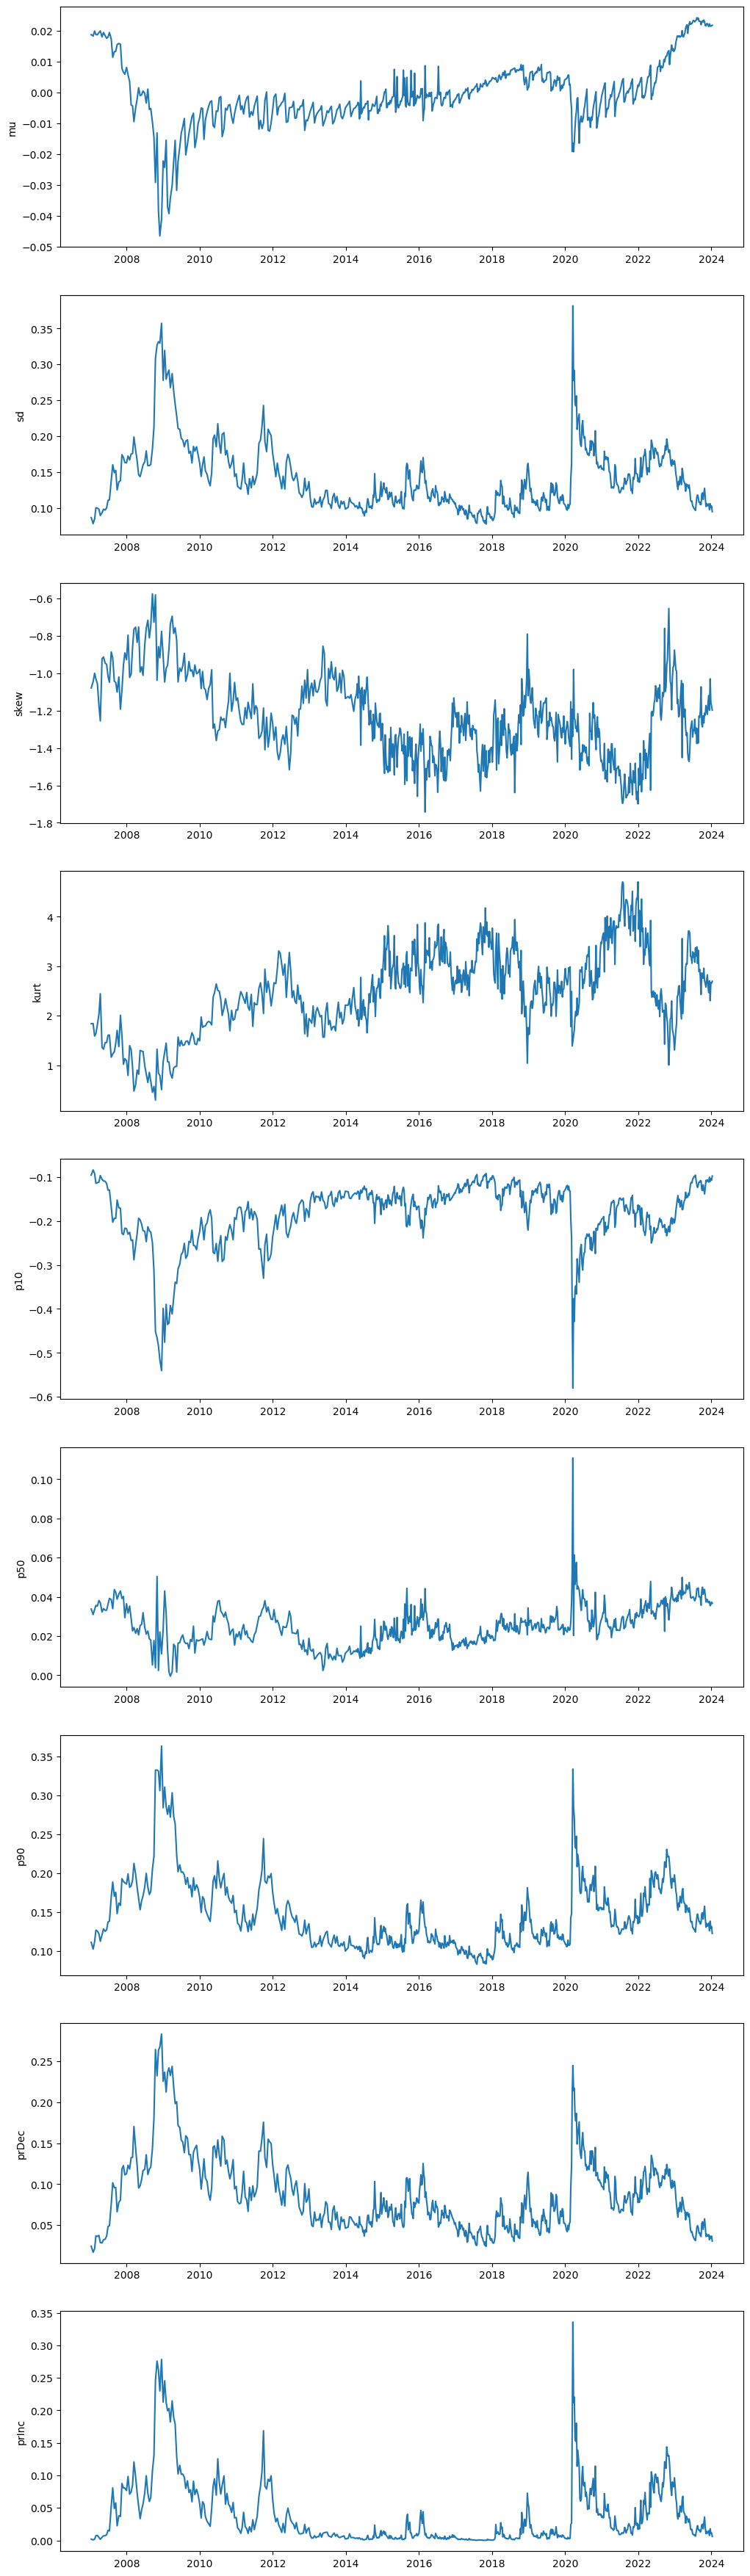

In [5]:
cols = ['mu', 'sd', 'skew', 'kurt', 'p10','p50', 'p90','prDec','prInc']
fig,axes = plt.subplots(len(cols),figsize=(12,45))



for index,col in enumerate(cols):
    axes[index].plot(sp6m_data['idt'],sp6m_data[col])
    axes[index].set_ylabel(col)
    
plt.show()


In [6]:
sp500data = yahooFinance.Ticker("^SP500TR")
sp500_df = sp500data.history(period="max")
sp500_df['log return'] = np.log(sp500_df['Close']/sp500_df['Close'].shift(1))
sp500_Index = [datetime.strptime(str(date),'%Y-%m-%d %H:%M:%S%z').date() for date in list(sp500_df.index)] 
sp500_df.index = pd.to_datetime(sp500_Index)

In [7]:
sp500_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log return
1988-01-04,256.019989,256.019989,256.019989,256.019989,0,0.0,0.0,NaN
1988-01-05,258.769989,258.769989,258.769989,258.769989,0,0.0,0.0,0.010684
1988-01-06,259.029999,259.029999,259.029999,259.029999,0,0.0,0.0,0.001004
1988-01-07,261.209991,261.209991,261.209991,261.209991,0,0.0,0.0,0.008381
1988-01-08,243.550003,243.550003,243.550003,243.550003,0,0.0,0.0,-0.070002


In [8]:
sp6m_dates =  [str(date) for date in list(sp6m_data['idt'])]
sp500_dates = [str(date) for date in list(sp500_df.index)]  


In [9]:
current_dates = list(sp6m_data['idt'])[:665]

In [39]:
sp500_dates = sp500_df.index
returns = []
fwd_dates_list = []
for index,date in enumerate(list(sp6m_data['idt'])): 
    date_index_key = pd.to_datetime(date).date().strftime("%Y-%m-%d")
    
    while not date_index_key in sp500_dates:
        date = date + timedelta(days = 1)
        date_index_key = pd.to_datetime(date).date().strftime("%Y-%m-%d")
    
    
    forward_date  = pd.to_datetime(date).date() + timedelta(days = 180)
    print(forward_date)
    forward_date_key = forward_date.strftime("%Y-%m-%d")
    
    while not forward_date_key in sp500_dates:
        #print(forward_date.date())
        forward_date = forward_date + timedelta(days = 1)
        forward_date_key = forward_date.strftime("%Y-%m-%d")
    
    
    
    fwd_dates_list.append(forward_date)
    
    stock_return = np.log(sp500_df['Close'].loc[forward_date_key]/sp500_df['Close'].loc[date_index_key])
    stock_return = (sp500_df['Close'].loc[forward_date_key]/sp500_df['Close'].loc[date_index_key])-1
    print(stock_return)
    returns.append(stock_return)
    


2007-07-11
0.07116575304409634
2007-07-30
0.03404848642467684
2007-08-14
-0.012110339151752414
2007-08-27
0.05140229544563257
2007-09-11
0.06599448073019021
2007-09-26
0.08336359032243879
2007-10-10
0.08524640727901511
2007-10-27
0.04907337118452593
2007-11-11
-0.03265785887630612
2007-11-27
-0.0585553487409316
2007-12-12
-0.021032523977667417
2007-12-26
0.0057094398187746975
2008-01-09
-0.08346711854391842
2008-01-27
-0.06051422593925848
2008-02-11
-0.0390945581370602
2008-02-27
-0.05422856058190084
2008-03-12
-0.10909755566599988
2008-03-26
-0.1126662149637292
2008-04-12
-0.13327580157997254
2008-04-28
-0.0893891946210833
2008-05-13
-0.02342847215317445
2008-05-28
-0.05134475818426765
2008-06-11
-0.08071479953422545
2008-06-28
-0.11913816579115799
2008-07-13
-0.1010960800566093
2008-07-29
-0.0741223989320382
2008-08-13
-0.037396861687454486
2008-08-27
-0.02681312372850697
2008-09-10
-0.033717224969338155
2008-09-27
-0.1545187094758953
2008-10-12
-0.23980954718682934
2008-10-27
-0.380

OverflowError: date value out of range

In [11]:
returns_df = pd.DataFrame([current_dates,fwd_dates_list,returns]).T
returns_df.columns = ['Date','6months','Returns']
returns_df['Returns'] = pd.to_numeric(returns_df['Returns'])


,Date,6months,Returns
660,2023-08-02,2024-01-29,0.095629
661,2023-08-09,2024-02-05,0.108796
662,2023-08-16,2024-02-12,0.138577
663,2023-08-23,2024-02-20,0.122552
664,2023-08-30,2024-02-26,0.123451


In [13]:
sp6m_data_final = sp6m_data[sp6m_data['idt'].isin(current_dates)]

In [14]:
sp6m_data_final.rename(columns={'idt':'Date'},inplace=True)

/var/folders/cp/p3rk934j69l8v61fbfgp2c5r0000gn/T/ipykernel_21953/2827904563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp6m_data_final.rename(columns={'idt':'Date'},inplace=True)


In [50]:
sp6m_data_final.to_excel("sp6m_final_new.xlsx")

In [51]:
returns_df.to_excel("return_final_new.xlsx")

In [ ]:
sp6m_df = sp6m_data[cols]
sp6m_df.index = sp6m_data.idt

spm_prob_returns = pd.concat([sp6m_df, returns_df], axis=1).dropna()

In [ ]:
spm_prob_returns

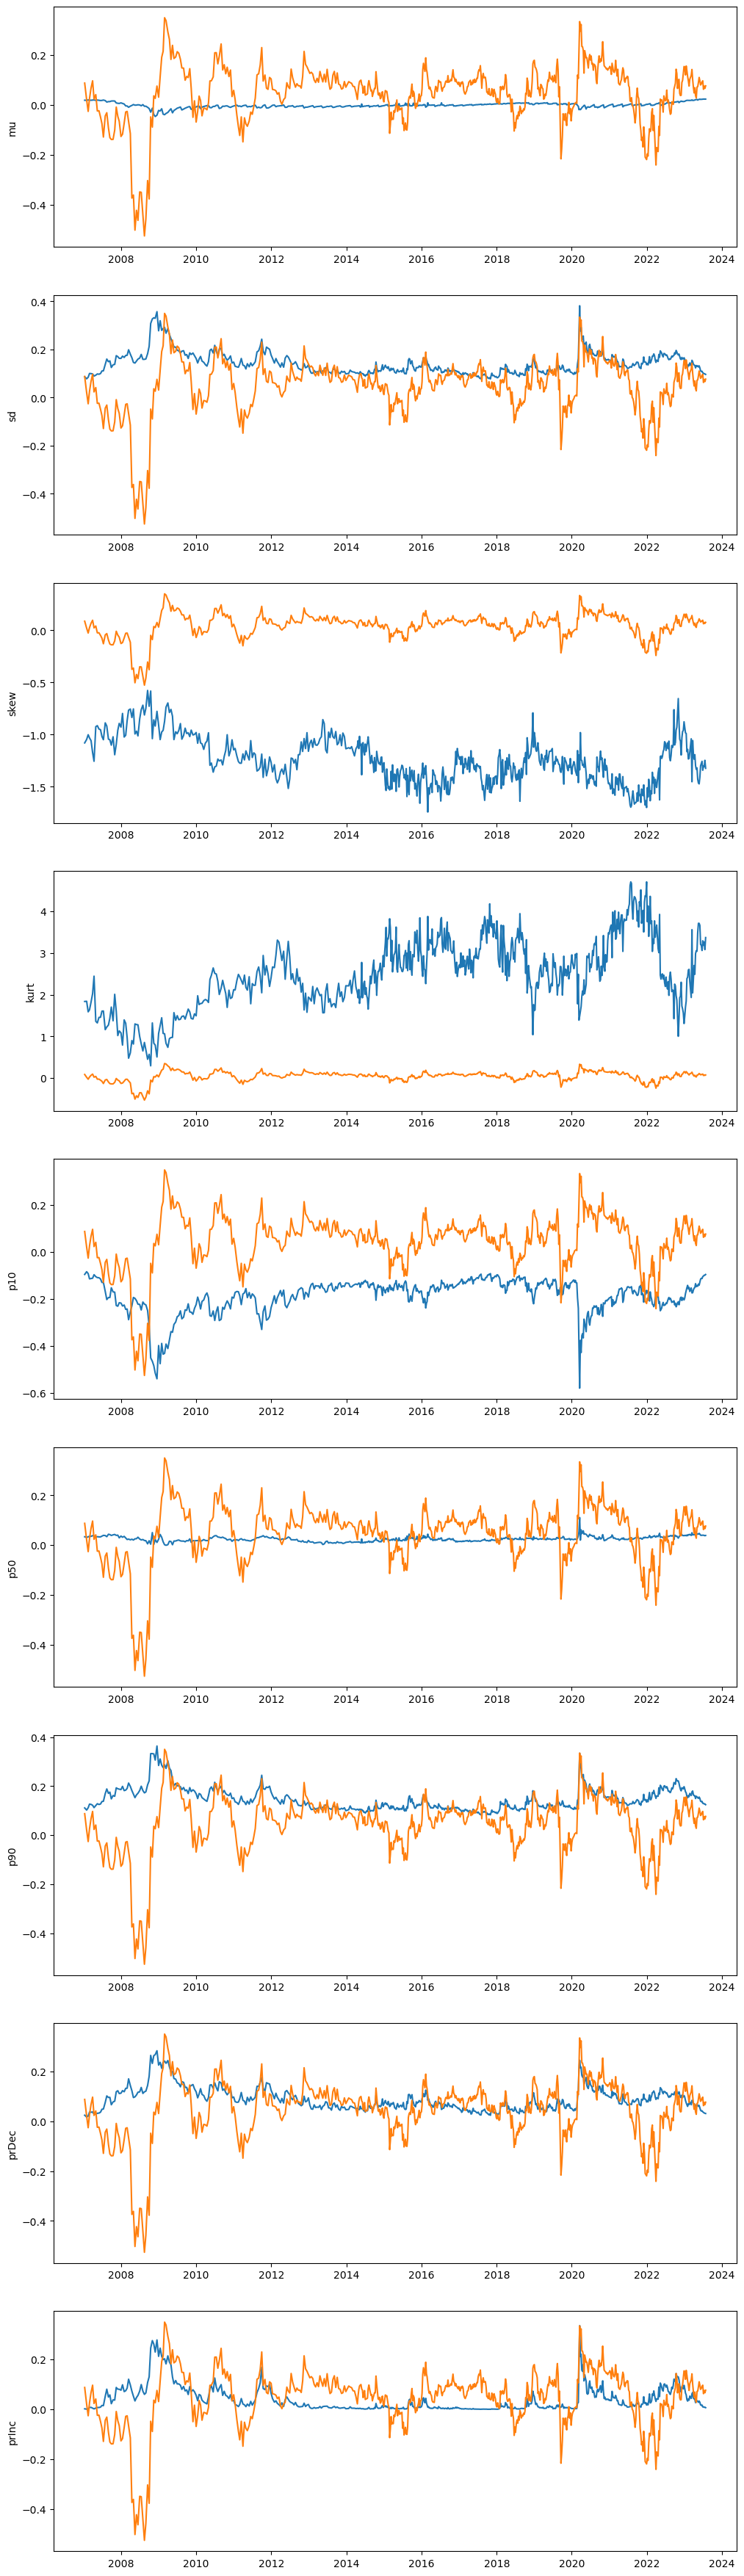

In [356]:
cols = ['mu', 'sd', 'skew', 'kurt', 'p10','p50', 'p90','prDec','prInc']
fig,axes = plt.subplots(len(cols),figsize=(12,45))



for index,col in enumerate(cols):
    axes[index].plot(spm_prob_returns.index,spm_prob_returns[col])
    axes[index].plot(spm_prob_returns.index,spm_prob_returns['Returns'])
    axes[index].set_ylabel(col)

    
plt.show()


In [20]:
return_data_excel = pd.read_excel("sp6m_final.xlsx")

In [23]:
return_data_excel

,Unnamed: 0,market,Date,maturity_target,FUTURE_DATE,Return,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
0,9326,sp6m,2007-01-12,6.0,2007-07-11,0.068748,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20,0.024242,20,0.001915
1,9327,sp6m,2007-01-31,6.0,2007-07-30,0.033482,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20,0.016758,20,0.000767
2,9328,sp6m,2007-02-15,6.0,2007-08-14,-0.012184,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20,0.021096,20,0.001900
3,9329,sp6m,2007-02-28,6.0,2007-08-27,0.050125,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20,0.036788,20,0.007350
4,9330,sp6m,2007-03-15,6.0,2007-09-11,0.063908,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20,0.036138,20,0.007715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,9986,sp6m,2023-08-02,6.0,2024-01-29,0.095629,0.023420,0.105920,-1.293800,3.208540,-0.108400,0.04040,0.134920,-20,0.038590,20,0.012970
661,9987,sp6m,2023-08-09,6.0,2024-02-05,0.108796,0.024300,0.115340,-1.376830,3.388550,-0.118440,0.04425,0.143690,-20,0.047200,20,0.018740
662,9988,sp6m,2023-08-16,6.0,2024-02-12,0.138577,0.023790,0.117870,-1.297440,3.056000,-0.123690,0.04379,0.147460,-20,0.049280,20,0.022720
663,9989,sp6m,2023-08-23,6.0,2024-02-20,0.122552,0.024210,0.114590,-1.374020,3.321540,-0.119050,0.04453,0.142360,-20,0.046940,20,0.017120


In [35]:
return_data_excel = pd.read_excel("sp6m_final.xlsx")
return_data_excel = return_data_excel[500:]

In [41]:
cols = return_data_excel.columns[5:]

In [46]:
moment_cols = cols[1:5]

Index(['mu', 'sd', 'skew', 'kurt'], dtype='object')

In [49]:
data_regress = return_data_excel[cols]


# Add a constant term for the intercept in the regression model
data_regress['const'] = 1

# Specify the independent variables (X1, X2) and the dependent variable (Y)
for index,col in moment_cols:
    X = data_regress[['const',col]]
    y = data_regress['Return']

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print the regression results
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                 5.461e-05
Date:                Thu, 29 Feb 2024   Prob (F-statistic):              0.994
Time:                        11:57:38   Log-Likelihood:                 138.72
No. Observations:                 165   AIC:                            -273.4
Df Residuals:                     163   BIC:                            -267.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0532      0.009      5.725      0.0

/var/folders/cp/p3rk934j69l8v61fbfgp2c5r0000gn/T/ipykernel_21953/3093309863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regress['const'] = 1


In [362]:

# Add a constant term for the intercept in the regression model
spm_prob_returns['const'] = 1

# Specify the independent variables (X1, X2) and the dependent variable (Y)
X = spm_prob_returns[cols]
y = spm_prob_returns['Returns']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Returns   R-squared (uncentered):                   0.307
Model:                            OLS   Adj. R-squared (uncentered):              0.297
Method:                 Least Squares   F-statistic:                              31.96
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                    1.70e-46
Time:                        15:13:49   Log-Likelihood:                          592.09
No. Observations:                 659   AIC:                                     -1166.
Df Residuals:                     650   BIC:                                     -1126.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [365]:
sp6m_data

2,market,idt,maturity_target,mu,sd,skew,kurt,p10,p50,p90,lg_change_decr,prDec,lg_change_incr,prInc
9326,sp6m,2007-01-12,6.0,0.018803,0.086435,-1.079705,1.837194,-0.095498,0.03382,0.111149,-20.0,0.024242,20.0,0.001915
9327,sp6m,2007-01-31,6.0,0.018350,0.077969,-1.046439,1.842209,-0.083769,0.03099,0.102377,-20.0,0.016758,20.0,0.000767
9328,sp6m,2007-02-15,6.0,0.019976,0.084543,-1.001081,1.588657,-0.092096,0.03361,0.111834,-20.0,0.021096,20.0,0.001900
9329,sp6m,2007-02-28,6.0,0.018823,0.100147,-1.031801,1.638698,-0.114332,0.03565,0.126683,-20.0,0.036788,20.0,0.007350
9330,sp6m,2007-03-15,6.0,0.018767,0.099519,-1.058040,1.823271,-0.112902,0.03536,0.125505,-20.0,0.036138,20.0,0.007715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,sp6m,2023-12-13,6.0,0.022320,0.097290,-1.198500,2.704270,-0.100300,0.03776,0.125810,-20.0,0.032020,20.0,0.007590
10007,sp6m,2023-12-20,6.0,0.021640,0.105770,-1.030920,2.302840,-0.110120,0.03546,0.138320,-20.0,0.036470,20.0,0.017900
10008,sp6m,2023-12-27,6.0,0.021510,0.100210,-1.156640,2.667710,-0.103680,0.03616,0.129090,-20.0,0.034090,20.0,0.010800
10009,sp6m,2024-01-03,6.0,0.021740,0.102560,-1.175850,2.655710,-0.107340,0.03734,0.131320,-20.0,0.036440,20.0,0.011480


In [ ]:

# Add a constant term for the intercept in the regression model
spm_prob_returns['const'] = 1

# Specify the independent variables (X1, X2) and the dependent variable (Y)
X = spm_prob_returns[['const', 'sd']]
y = spm_prob_returns['Returns']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

In [406]:

# Add a constant term for the intercept in the regression model
spm_prob_returns['const'] = 1

# Specify the independent variables (X1, X2) and the dependent variable (Y)
X = pd.DataFrame(spm_prob_returns['p10'].diff().fillna(0))
y = spm_prob_returns['Returns']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Returns   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.06740
Date:                Thu, 08 Feb 2024   Prob (F-statistic):                       0.795
Time:                        15:51:47   Log-Likelihood:                          471.38
No. Observations:                 659   AIC:                                     -940.8
Df Residuals:                     658   BIC:                                     -936.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------